# PyTorch Deep Learning - Exam Preparation Guide 🔥

## 📚 Complete PyTorch Implementation Reference

**Perfect for exam preparation!** This notebook contains clean, simple, and explainable PyTorch implementations of all essential deep learning concepts.

### 🎯 What's Inside:

1. **📈 Linear Regression** - Foundation with PyTorch tensors and autograd
2. **🎯 Logistic Regression** - Binary classification with sigmoid activation
3. **🧠 Neural Networks** - Multi-layer perceptrons with backpropagation
4. **🔄 Batch Normalization** - Stabilizing training in deep networks
5. **⚙️ Advanced Training** - Optimizers, schedulers, and regularization
6. **📊 Model Evaluation** - Comprehensive metrics and validation
7. **🏆 All Concepts Combined** - Complete implementation showcase

### ✅ Exam-Ready Features:

- **Simple & Clean Code**: Easy to understand and reproduce
- **Pure PyTorch**: Only PyTorch implementations (exam-focused)
- **Well Commented**: Every line explained for clarity
- **Complete Examples**: End-to-end working implementations
- **Real Datasets**: Practical examples with actual data

---

**🚀 Master PyTorch for your deep learning exam!**


In [1]:
# Essential PyTorch Imports - Memorize These! 🧠

import torch
import torch.nn as nn  # Neural network modules (Linear, Conv2d, etc.)
import torch.optim as optim  # Optimizers (SGD, Adam, RMSprop, etc.)
import torch.nn.functional as F  # Activation functions and loss functions
from torch.utils.data import DataLoader, TensorDataset, random_split

# Data handling and visualization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import (
    make_regression,
    make_classification,
    load_breast_cancer,
    load_digits,
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    mean_squared_error,
)

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Set device (CPU/GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Configure plotting
plt.style.use("default")
sns.set_palette("husl")

print("🔥 PyTorch Setup Complete!")
print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")
print("✅ Ready for deep learning!")

# Quick PyTorch basics demonstration
print("\n📚 PyTorch Basics:")
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = x.sum()
y.backward()
print(f"Tensor: {x}")
print(f"Gradients: {x.grad}")
print("✅ Autograd working!")

🔥 PyTorch Setup Complete!
PyTorch version: 2.7.1
Device: cpu
✅ Ready for deep learning!

📚 PyTorch Basics:
Tensor: tensor([1., 2., 3.], requires_grad=True)
Gradients: tensor([1., 1., 1.])
✅ Autograd working!


# Section 1: Linear Regression with PyTorch 📈

## 🎯 Concept: Linear Regression

**Goal**: Predict continuous values using linear relationships  
**Formula**: `y = X @ w + b`  
**Loss**: Mean Squared Error (MSE)  
**Optimizer**: Gradient Descent

## 📝 Exam Template - Memorize This Pattern!


📊 Step 1: Create Data
Data shape: X=torch.Size([100, 1]), y=torch.Size([100, 1])

🏗️ Step 2: Create Model
Model: LinearRegression(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

⚙️ Step 3: Define Loss and Optimizer
Loss: MSELoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

🚀 Step 4: Training Loop
Epoch [200/1000], Loss: 80.5052
Epoch [400/1000], Loss: 78.0587
Epoch [600/1000], Loss: 78.0543
Epoch [800/1000], Loss: 78.0542
Epoch [1000/1000], Loss: 78.0542

📊 Step 5: Results
Final Loss: 78.0542
Learned Weight: 44.4371
Learned Bias: 1.1651
Loss: MSELoss()
Optimizer: SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

🚀 Step 4: Training Loop
Epoch [200/1000], Loss: 80.5052
Epo

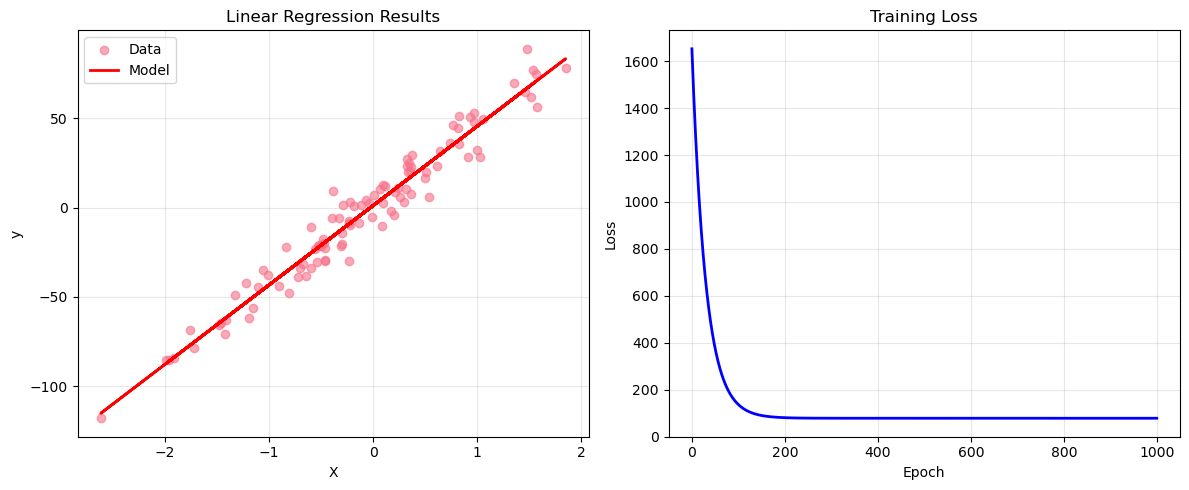


✅ Linear Regression Complete!
🔑 Key PyTorch concepts: nn.Module, nn.Linear, autograd, training loop


In [2]:
# 1. Complete Linear Regression Implementation


class LinearRegression(nn.Module):
    """Simple Linear Regression Model - Exam Template"""

    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        # Define linear layer: y = x*w + b
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        # Forward pass: compute predictions
        return self.linear(x)


# Step 1: Create data
print("📊 Step 1: Create Data")
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Convert to PyTorch tensors (ESSENTIAL!)
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y).reshape(-1, 1)

print(f"Data shape: X={X_tensor.shape}, y={y_tensor.shape}")

# Step 2: Create model
print("\n🏗️ Step 2: Create Model")
model = LinearRegression(input_size=1, output_size=1)
print(f"Model: {model}")

# Step 3: Define loss and optimizer
print("\n⚙️ Step 3: Define Loss and Optimizer")
criterion = nn.MSELoss()  # Mean Squared Error
optimizer = optim.SGD(model.parameters(), lr=0.01)  # Stochastic Gradient Descent
print(f"Loss: {criterion}")
print(f"Optimizer: {optimizer}")

# Step 4: Training loop (MEMORIZE THIS PATTERN!)
print("\n🚀 Step 4: Training Loop")
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    # Forward pass
    predictions = model(X_tensor)

    # Compute loss
    loss = criterion(predictions, y_tensor)

    # Zero gradients (CRITICAL!)
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()

    # Store loss
    losses.append(loss.item())

    # Print progress
    if (epoch + 1) % 200 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

# Step 5: Evaluate and visualize
print("\n📊 Step 5: Results")
model.eval()
with torch.no_grad():
    final_predictions = model(X_tensor)
    final_loss = criterion(final_predictions, y_tensor)

# Get learned parameters
weight = model.linear.weight.item()
bias = model.linear.bias.item()

print(f"Final Loss: {final_loss.item():.4f}")
print(f"Learned Weight: {weight:.4f}")
print(f"Learned Bias: {bias:.4f}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot data and predictions
ax1.scatter(X_tensor.numpy(), y_tensor.numpy(), alpha=0.6, label="Data")
ax1.plot(X_tensor.numpy(), final_predictions.numpy(), "r-", linewidth=2, label="Model")
ax1.set_xlabel("X")
ax1.set_ylabel("y")
ax1.set_title("Linear Regression Results")
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot training loss
ax2.plot(losses, "b-", linewidth=2)
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.set_title("Training Loss")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Linear Regression Complete!")
print("🔑 Key PyTorch concepts: nn.Module, nn.Linear, autograd, training loop")

# Section 2: Logistic Regression with PyTorch 🎯

## 🎯 Concept: Binary Classification

**Goal**: Classify data into two categories (0 or 1)  
**Formula**: `p = σ(X @ w + b)` where `σ(z) = 1/(1 + e^(-z))`  
**Loss**: Binary Cross-Entropy  
**Output**: Probabilities between 0 and 1

## 📝 Exam Template - Binary Classification Pattern


📊 Step 1: Load Data (Breast Cancer Dataset)
Train data: torch.Size([455, 30]), torch.Size([455, 1])
Test data: torch.Size([114, 30]), torch.Size([114, 1])
Features: 30, Classes: 2

🏗️ Step 2: Create Model
Model: LogisticRegression(
  (linear): Linear(in_features=30, out_features=1, bias=True)
)

⚙️ Step 3: Define Loss and Optimizer
Loss: BCELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

🚀 Step 4: Training Loop
Epoch [100/500], Loss: 0.3212, Accuracy: 0.9209
Epoch [200/500], Loss: 0.2281, Accuracy: 0.9407
Epoch [300/500], Loss: 0.1837, Accuracy: 0.9538
Epoch [400/500], Loss: 0.1576, Accuracy: 0.9582
Epoch [500/500], Loss: 0.1403, Accuracy: 0.9604

📊 Step 5: Test Set Evaluation
Test Loss: 0.1186
Test Accuracy: 0.9825

Detailed Classification Report:
              p

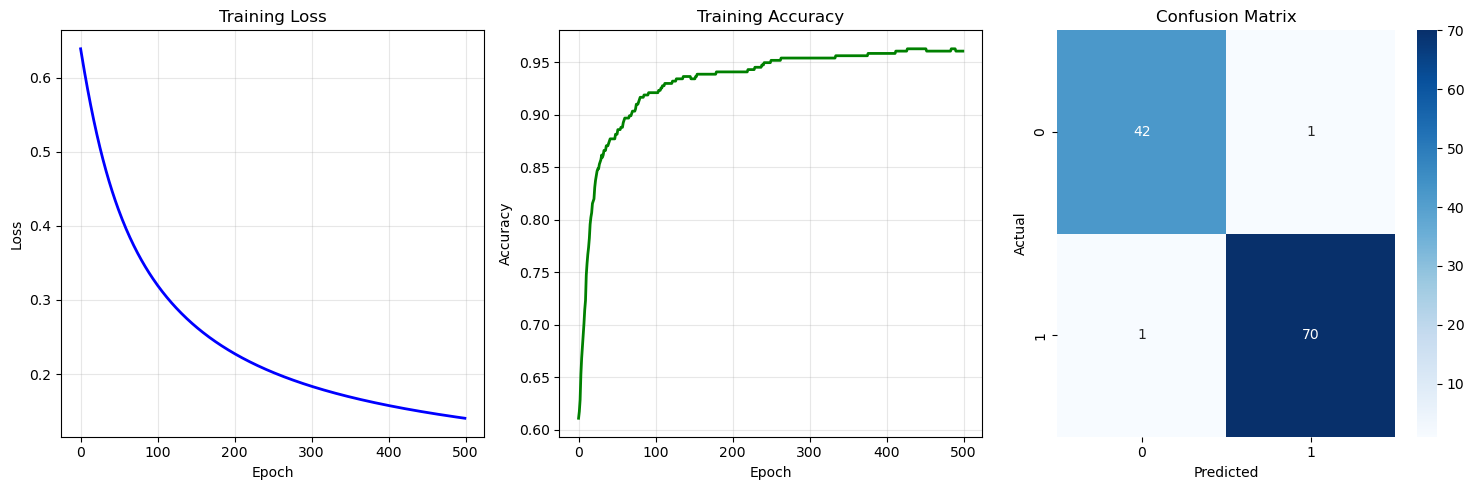


✅ Logistic Regression Complete!
🔑 Key concepts: sigmoid activation, BCE loss, binary classification


In [3]:
# 2. Complete Logistic Regression Implementation


class LogisticRegression(nn.Module):
    """Binary Classification Model - Exam Template"""

    def __init__(self, input_size):
        super(LogisticRegression, self).__init__()
        # Linear layer + sigmoid activation
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        # Linear transformation followed by sigmoid
        return torch.sigmoid(self.linear(x))


# Step 1: Load real dataset
print("📊 Step 1: Load Data (Breast Cancer Dataset)")
data = load_breast_cancer()
X, y = data.data, data.target

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

print(f"Train data: {X_train_tensor.shape}, {y_train_tensor.shape}")
print(f"Test data: {X_test_tensor.shape}, {y_test_tensor.shape}")
print(f"Features: {X.shape[1]}, Classes: {len(np.unique(y))}")

# Step 2: Create model
print("\n🏗️ Step 2: Create Model")
model = LogisticRegression(input_size=X.shape[1])
print(f"Model: {model}")

# Step 3: Define loss and optimizer
print("\n⚙️ Step 3: Define Loss and Optimizer")
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer
print(f"Loss: {criterion}")
print(f"Optimizer: {optimizer}")

# Step 4: Training loop
print("\n🚀 Step 4: Training Loop")
num_epochs = 500
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    # Forward pass
    y_pred = model(X_train_tensor)

    # Compute loss
    loss = criterion(y_pred, y_train_tensor)

    # Zero gradients
    optimizer.zero_grad()

    # Backward pass
    loss.backward()

    # Update parameters
    optimizer.step()

    # Calculate accuracy
    with torch.no_grad():
        predictions = (y_pred > 0.5).float()
        accuracy = (predictions == y_train_tensor).float().mean()

    train_losses.append(loss.item())
    train_accuracies.append(accuracy.item())

    if (epoch + 1) % 100 == 0:
        print(
            f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {accuracy.item():.4f}"
        )

# Step 5: Evaluate on test set
print("\n📊 Step 5: Test Set Evaluation")
model.eval()
with torch.no_grad():
    # Get predictions
    test_probs = model(X_test_tensor)
    test_predictions = (test_probs > 0.5).float()

    # Calculate metrics
    test_accuracy = (test_predictions == y_test_tensor).float().mean()
    test_loss = criterion(test_probs, y_test_tensor)

print(f"Test Loss: {test_loss.item():.4f}")
print(f"Test Accuracy: {test_accuracy.item():.4f}")

# Detailed metrics
y_test_np = y_test_tensor.numpy().flatten()
test_pred_np = test_predictions.numpy().flatten()
print(f"\nDetailed Classification Report:")
print(
    classification_report(y_test_np, test_pred_np, target_names=["Malignant", "Benign"])
)

# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Training loss
axes[0].plot(train_losses, "b-", linewidth=2)
axes[0].set_xlabel("Epoch")
axes[0].set_ylabel("Loss")
axes[0].set_title("Training Loss")
axes[0].grid(True, alpha=0.3)

# Training accuracy
axes[1].plot(train_accuracies, "g-", linewidth=2)
axes[1].set_xlabel("Epoch")
axes[1].set_ylabel("Accuracy")
axes[1].set_title("Training Accuracy")
axes[1].grid(True, alpha=0.3)

# Confusion matrix
cm = confusion_matrix(y_test_np, test_pred_np)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[2])
axes[2].set_xlabel("Predicted")
axes[2].set_ylabel("Actual")
axes[2].set_title("Confusion Matrix")

plt.tight_layout()
plt.show()

print("\n✅ Logistic Regression Complete!")
print("🔑 Key concepts: sigmoid activation, BCE loss, binary classification")

# Section 3: Neural Networks with PyTorch 🧠

## 🎯 Concept: Multi-Layer Perceptron (MLP)

**Goal**: Learn complex non-linear patterns using hidden layers  
**Architecture**: Input → Hidden Layer(s) → Output  
**Activation**: ReLU for hidden layers, appropriate for output  
**Capability**: Universal function approximation

## 📝 Exam Template - Multi-Class Classification


📊 Step 1: Create Multi-Class Data
Dataset: 1000 samples, 64 features, 10 classes
Train: torch.Size([800, 64]), Test: torch.Size([200, 64])

🏗️ Step 2: Create Neural Network
Model Architecture:
Input: 64 → Hidden: 128 → Hidden: 64 → Output: 10
Total parameters: 17226

⚙️ Step 3: Setup Training
Loss: CrossEntropyLoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    initial_lr: 0.001
    lr: 0.001
    maximize: False
    weight_decay: 0
)
Scheduler: <torch.optim.lr_scheduler.StepLR object at 0x17bc30050>

🚀 Step 4: Training Loop
Epoch [50/300]
  Train Loss: 0.4851, Train Acc: 0.9031
  Val Loss: 0.4650, Val Acc: 0.9000
  Learning Rate: 0.001000
Epoch [100/300]
  Train Loss: 0.0952, Train Acc: 0.9844
  Val Loss: 0.1503, Val Acc: 0.9563
  Learning Rate: 0.000900
Epoch [150/300]
  Train Loss: 0.0540, Train Acc: 0.9859
  Val Loss

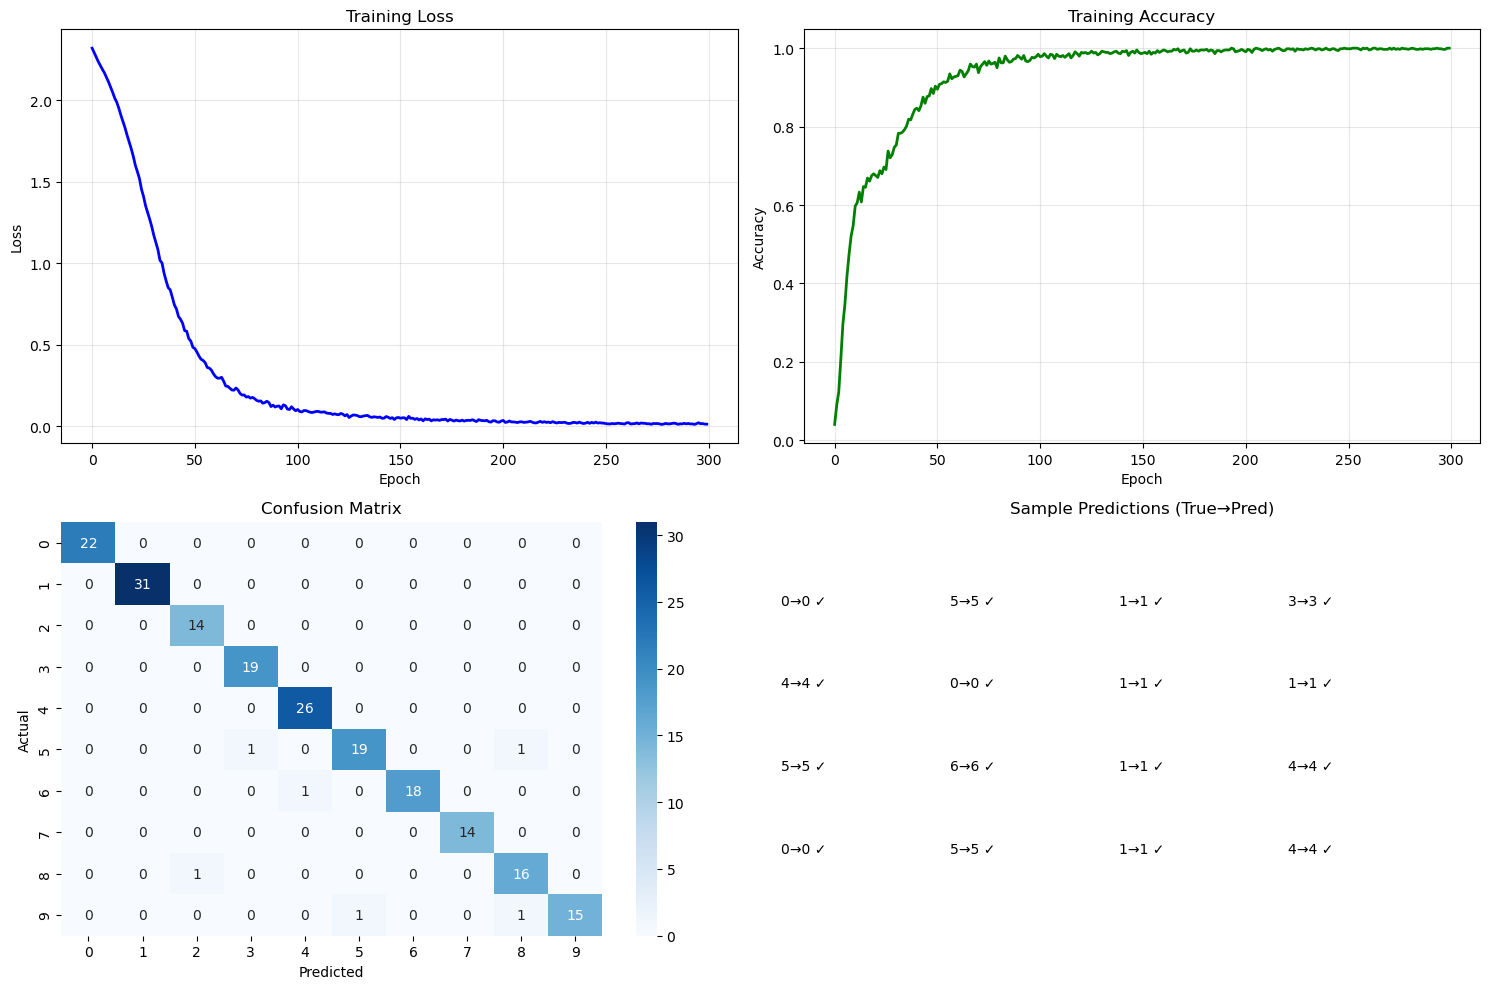


✅ Neural Network Complete!
🔑 Key concepts: hidden layers, ReLU activation, dropout, multi-class classification


In [4]:
# 3. Complete Neural Network Implementation


class NeuralNetwork(nn.Module):
    """Multi-Layer Perceptron - Exam Template"""

    def __init__(self, input_size, hidden_size, output_size, dropout_prob=0.2):
        super(NeuralNetwork, self).__init__()
        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)  # First hidden layer
        self.fc2 = nn.Linear(hidden_size, hidden_size // 2)  # Second hidden layer
        self.fc3 = nn.Linear(hidden_size // 2, output_size)  # Output layer
        self.dropout = nn.Dropout(dropout_prob)  # Regularization
        self.relu = nn.ReLU()  # Activation function

    def forward(self, x):
        # Forward pass through network
        x = self.relu(self.fc1(x))  # Hidden layer 1 + ReLU
        x = self.dropout(x)  # Dropout for regularization
        x = self.relu(self.fc2(x))  # Hidden layer 2 + ReLU
        x = self.dropout(x)  # Dropout for regularization
        x = self.fc3(x)  # Output layer (no activation for logits)
        return x


# Step 1: Create multi-class dataset
print("📊 Step 1: Create Multi-Class Data")
digits = load_digits()
X, y = digits.data, digits.target

# Use subset for faster training (exam scenario)
n_samples = 1000
indices = np.random.choice(len(X), n_samples, replace=False)
X_subset = X[indices]
y_subset = y[indices]

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X_subset, y_subset, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.LongTensor(y_train)  # Long tensor for classification
y_test_tensor = torch.LongTensor(y_test)

print(
    f"Dataset: {len(X_subset)} samples, {X.shape[1]} features, {len(np.unique(y))} classes"
)
print(f"Train: {X_train_tensor.shape}, Test: {X_test_tensor.shape}")

# Step 2: Create neural network
print("\n🏗️ Step 2: Create Neural Network")
input_size = X.shape[1]
hidden_size = 128
output_size = len(np.unique(y))

model = NeuralNetwork(input_size, hidden_size, output_size)
print(f"Model Architecture:")
print(
    f"Input: {input_size} → Hidden: {hidden_size} → Hidden: {hidden_size//2} → Output: {output_size}"
)
print(f"Total parameters: {sum(p.numel() for p in model.parameters())}")

# Step 3: Setup training
print("\n⚙️ Step 3: Setup Training")
criterion = nn.CrossEntropyLoss()  # Multi-class classification loss
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer
scheduler = optim.lr_scheduler.StepLR(
    optimizer, step_size=100, gamma=0.9
)  # Learning rate decay

print(f"Loss: {criterion}")
print(f"Optimizer: {optimizer}")
print(f"Scheduler: {scheduler}")

# Step 4: Training loop with validation
print("\n🚀 Step 4: Training Loop")
num_epochs = 300
train_losses = []
train_accuracies = []

# Split training data for validation
val_split = 0.2
val_size = int(len(X_train_tensor) * val_split)
train_size = len(X_train_tensor) - val_size

X_train_split = X_train_tensor[:train_size]
y_train_split = y_train_tensor[:train_size]
X_val = X_train_tensor[train_size:]
y_val = y_train_tensor[train_size:]

for epoch in range(num_epochs):
    # Training phase
    model.train()

    # Forward pass
    outputs = model(X_train_split)
    loss = criterion(outputs, y_train_split)

    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    scheduler.step()

    # Calculate training accuracy
    with torch.no_grad():
        _, predicted = torch.max(outputs.data, 1)
        train_accuracy = (predicted == y_train_split).float().mean()

    train_losses.append(loss.item())
    train_accuracies.append(train_accuracy.item())

    # Validation every 50 epochs
    if (epoch + 1) % 50 == 0:
        model.eval()
        with torch.no_grad():
            val_outputs = model(X_val)
            val_loss = criterion(val_outputs, y_val)
            _, val_predicted = torch.max(val_outputs.data, 1)
            val_accuracy = (val_predicted == y_val).float().mean()

        print(f"Epoch [{epoch+1}/{num_epochs}]")
        print(
            f"  Train Loss: {loss.item():.4f}, Train Acc: {train_accuracy.item():.4f}"
        )
        print(f"  Val Loss: {val_loss.item():.4f}, Val Acc: {val_accuracy.item():.4f}")
        print(f"  Learning Rate: {scheduler.get_last_lr()[0]:.6f}")

# Step 5: Final evaluation
print("\n📊 Step 5: Final Evaluation")
model.eval()
with torch.no_grad():
    # Test predictions
    test_outputs = model(X_test_tensor)
    test_loss = criterion(test_outputs, y_test_tensor)
    _, test_predicted = torch.max(test_outputs.data, 1)
    test_accuracy = (test_predicted == y_test_tensor).float().mean()

    # Get probabilities
    test_probs = F.softmax(test_outputs, dim=1)

print(f"Test Loss: {test_loss.item():.4f}")
print(f"Test Accuracy: {test_accuracy.item():.4f}")

# Detailed evaluation
y_test_np = y_test_tensor.numpy()
test_pred_np = test_predicted.numpy()
print(f"\nClassification Report:")
print(classification_report(y_test_np, test_pred_np))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training metrics
axes[0, 0].plot(train_losses, "b-", linewidth=2)
axes[0, 0].set_xlabel("Epoch")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].set_title("Training Loss")
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(train_accuracies, "g-", linewidth=2)
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].set_ylabel("Accuracy")
axes[0, 1].set_title("Training Accuracy")
axes[0, 1].grid(True, alpha=0.3)

# Confusion matrix
cm = confusion_matrix(y_test_np, test_pred_np)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[1, 0])
axes[1, 0].set_xlabel("Predicted")
axes[1, 0].set_ylabel("Actual")
axes[1, 0].set_title("Confusion Matrix")

# Sample predictions
sample_images = X_test[:16].reshape(16, 8, 8)
sample_labels = y_test[:16]
sample_preds = test_pred_np[:16]

axes[1, 1].axis("off")
axes[1, 1].set_title("Sample Predictions (True→Pred)")
for i in range(4):
    for j in range(4):
        idx = i * 4 + j
        correct = "✓" if sample_labels[idx] == sample_preds[idx] else "✗"
        axes[1, 1].text(
            j * 0.25,
            0.8 - i * 0.2,
            f"{sample_labels[idx]}→{sample_preds[idx]} {correct}",
            fontsize=10,
            ha="center",
        )

plt.tight_layout()
plt.show()

print("\n✅ Neural Network Complete!")
print(
    "🔑 Key concepts: hidden layers, ReLU activation, dropout, multi-class classification"
)

# Section 4: Batch Normalization with PyTorch 🔄

## 🎯 Concept: Batch Normalization

**Goal**: Stabilize training by normalizing layer inputs  
**Formula**: `y = γ * (x - μ) / σ + β`  
**Benefits**: Faster training, higher learning rates, regularization effect  
**Key**: Normalizes activations to have zero mean and unit variance

## 📝 Exam Template - Network with Batch Normalization


📊 Step 1: Create Challenging Dataset
Dataset: 2000 samples, 20 features, 5 classes
Train: torch.Size([1600, 20]), Test: torch.Size([400, 20])

🏗️ Step 2: Create Models for Comparison
Architecture: 20 → 64 → 32 → 16 → 5
Model with BN parameters: 4261
Model without BN parameters: 4037

🚀 Step 4: Training Comparison
Training with Batch Normalization:
With BN - Epoch [50/200], Loss: 1.2440, Acc: 0.5275
With BN - Epoch [50/200], Loss: 1.2440, Acc: 0.5275
With BN - Epoch [100/200], Loss: 0.8453, Acc: 0.7106
With BN - Epoch [100/200], Loss: 0.8453, Acc: 0.7106
With BN - Epoch [150/200], Loss: 0.6862, Acc: 0.7644
With BN - Epoch [150/200], Loss: 0.6862, Acc: 0.7644
With BN - Epoch [200/200], Loss: 0.6088, Acc: 0.7800

Training without Batch Normalization:
Without BN - Epoch [50/200], Loss: 1.5839, Acc: 0.2906
With BN - Epoch [200/200], Loss: 0.6088, Acc: 0.7800

Training without Batch Normalization:
Without BN - Epoch [50/200], Loss: 1.5839, Acc: 0.2906
Without BN - Epoch [100/200], Loss: 1.51

/var/folders/vh/lm95s78n4rl___p676l6zh8w0000gn/T/ipykernel_31377/3786241924.py:227: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/opt/anaconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


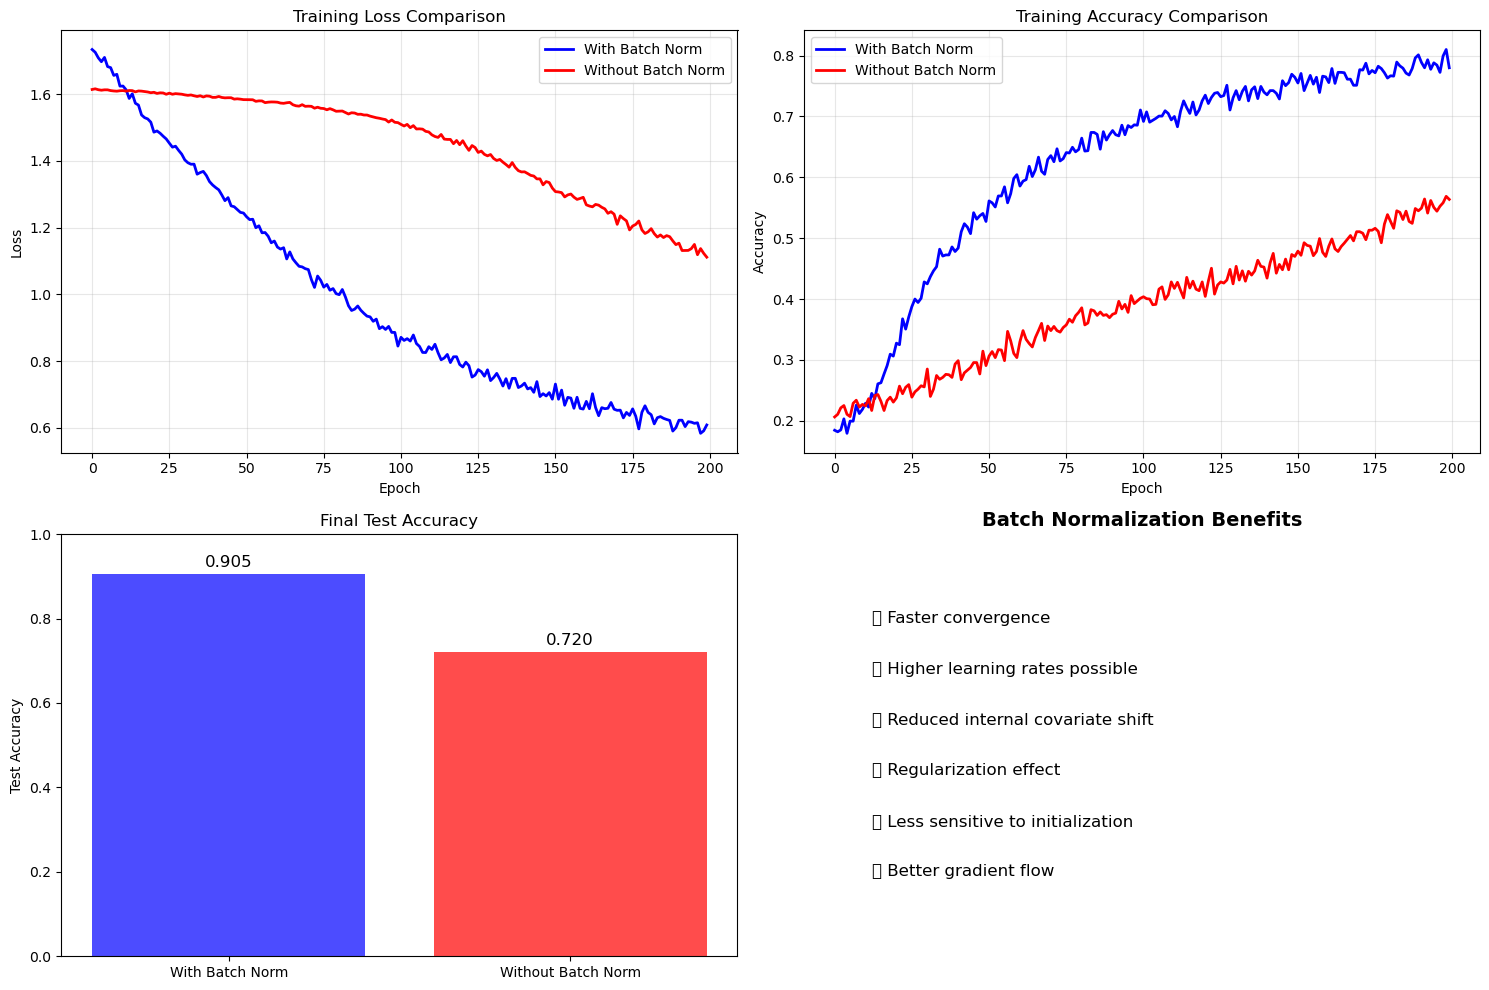


✅ Batch Normalization Complete!
🔑 Key concepts: nn.BatchNorm1d, training stability, internal covariate shift

🔬 Batch Norm in Action - Activation Statistics:
Before Batch Norm - Mean: [-0.05731647 -0.17614248  0.11989552  0.09800291  0.06586829]
Before Batch Norm - Std:  [0.567913  0.7340886 0.4763949 0.7632701 0.5340582]
After Batch Norm - Mean:  [-0.20631765  0.01112166  0.0199508  -0.02861067 -0.00095173]
After Batch Norm - Std:   [0.9752939 1.0477108 0.9242492 1.0671248 1.084132 ]
Notice: After BN, mean ≈ 0 and std ≈ 1 (normalized)


In [5]:
# 4. Complete Batch Normalization Implementation


class NetworkWithBatchNorm(nn.Module):
    """Deep Network with Batch Normalization - Exam Template"""

    def __init__(self, input_size, hidden_sizes, output_size, use_batch_norm=True):
        super(NetworkWithBatchNorm, self).__init__()
        self.use_batch_norm = use_batch_norm

        # Build layers dynamically
        layer_sizes = [input_size] + hidden_sizes + [output_size]
        self.layers = nn.ModuleList()
        self.batch_norms = nn.ModuleList()

        for i in range(len(layer_sizes) - 1):
            # Add linear layer
            self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))

            # Add batch norm for hidden layers only
            if use_batch_norm and i < len(layer_sizes) - 2:
                self.batch_norms.append(nn.BatchNorm1d(layer_sizes[i + 1]))

        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()

    def forward(self, x):
        for i, layer in enumerate(self.layers[:-1]):
            x = layer(x)

            # Apply batch norm if enabled
            if self.use_batch_norm:
                x = self.batch_norms[i](x)

            x = self.relu(x)
            x = self.dropout(x)

        # Output layer (no batch norm, no activation)
        x = self.layers[-1](x)
        return x


# Step 1: Create challenging dataset
print("📊 Step 1: Create Challenging Dataset")
X, y = make_classification(
    n_samples=2000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=5,
    n_clusters_per_class=1,
    random_state=42,
)

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

print(
    f"Dataset: {X.shape[0]} samples, {X.shape[1]} features, {len(np.unique(y))} classes"
)
print(f"Train: {X_train_tensor.shape}, Test: {X_test_tensor.shape}")

# Step 2: Compare networks with and without batch norm
print("\n🏗️ Step 2: Create Models for Comparison")
input_size = X.shape[1]
hidden_sizes = [64, 32, 16]
output_size = len(np.unique(y))

# Model with batch normalization
model_with_bn = NetworkWithBatchNorm(
    input_size, hidden_sizes, output_size, use_batch_norm=True
)
# Model without batch normalization
model_without_bn = NetworkWithBatchNorm(
    input_size, hidden_sizes, output_size, use_batch_norm=False
)

print(
    f"Architecture: {input_size} → {' → '.join(map(str, hidden_sizes))} → {output_size}"
)
print(f"Model with BN parameters: {sum(p.numel() for p in model_with_bn.parameters())}")
print(
    f"Model without BN parameters: {sum(p.numel() for p in model_without_bn.parameters())}"
)


# Step 3: Training function
def train_model(model, model_name, num_epochs=200):
    "Train a model and return training history"

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(
        model.parameters(), lr=0.01, momentum=0.9
    )  # Higher LR for BN test

    train_losses = []
    train_accuracies = []

    for epoch in range(num_epochs):
        model.train()

        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        with torch.no_grad():
            _, predicted = torch.max(outputs.data, 1)
            accuracy = (predicted == y_train_tensor).float().mean()

        train_losses.append(loss.item())
        train_accuracies.append(accuracy.item())

        if (epoch + 1) % 50 == 0:
            print(
                f"{model_name} - Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Acc: {accuracy.item():.4f}"
            )

    return train_losses, train_accuracies


# Step 4: Train both models
print("\n🚀 Step 4: Training Comparison")
print("Training with Batch Normalization:")
losses_with_bn, acc_with_bn = train_model(model_with_bn, "With BN")

print("\nTraining without Batch Normalization:")
losses_without_bn, acc_without_bn = train_model(model_without_bn, "Without BN")

# Step 5: Evaluate both models
print("\n📊 Step 5: Evaluation Comparison")


def evaluate_model(model, model_name):
    model.eval()
    with torch.no_grad():
        outputs = model(X_test_tensor)
        test_loss = nn.CrossEntropyLoss()(outputs, y_test_tensor)
        _, predicted = torch.max(outputs.data, 1)
        test_accuracy = (predicted == y_test_tensor).float().mean()

    print(f"{model_name}:")
    print(f"  Test Loss: {test_loss.item():.4f}")
    print(f"  Test Accuracy: {test_accuracy.item():.4f}")
    return test_accuracy.item()


acc_bn = evaluate_model(model_with_bn, "With Batch Norm")
acc_no_bn = evaluate_model(model_without_bn, "Without Batch Norm")

print(f"\nImprovement with Batch Norm: {acc_bn - acc_no_bn:.4f}")

# Step 6: Visualization
print("\n📈 Step 6: Training Dynamics Visualization")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Training loss comparison
axes[0, 0].plot(losses_with_bn, "b-", label="With Batch Norm", linewidth=2)
axes[0, 0].plot(losses_without_bn, "r-", label="Without Batch Norm", linewidth=2)
axes[0, 0].set_xlabel("Epoch")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].set_title("Training Loss Comparison")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Training accuracy comparison
axes[0, 1].plot(acc_with_bn, "b-", label="With Batch Norm", linewidth=2)
axes[0, 1].plot(acc_without_bn, "r-", label="Without Batch Norm", linewidth=2)
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].set_ylabel("Accuracy")
axes[0, 1].set_title("Training Accuracy Comparison")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Final accuracy comparison
categories = ["With Batch Norm", "Without Batch Norm"]
accuracies = [acc_bn, acc_no_bn]
colors = ["blue", "red"]
bars = axes[1, 0].bar(categories, accuracies, color=colors, alpha=0.7)
axes[1, 0].set_ylabel("Test Accuracy")
axes[1, 0].set_title("Final Test Accuracy")
axes[1, 0].set_ylim(0, 1)

# Add accuracy values on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    axes[1, 0].text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.01,
        f"{acc:.3f}",
        ha="center",
        va="bottom",
        fontsize=12,
    )

# Batch norm benefits summary
axes[1, 1].axis("off")
axes[1, 1].set_title("Batch Normalization Benefits", fontsize=14, fontweight="bold")
benefits = [
    "✅ Faster convergence",
    "✅ Higher learning rates possible",
    "✅ Reduced internal covariate shift",
    "✅ Regularization effect",
    "✅ Less sensitive to initialization",
    "✅ Better gradient flow",
]
for i, benefit in enumerate(benefits):
    axes[1, 1].text(0.1, 0.8 - i * 0.12, benefit, fontsize=12, ha="left", va="center")

plt.tight_layout()
plt.show()

print("\n✅ Batch Normalization Complete!")
print("🔑 Key concepts: nn.BatchNorm1d, training stability, internal covariate shift")

# Demonstrate batch norm in action
print("\n🔬 Batch Norm in Action - Activation Statistics:")
model_with_bn.eval()
with torch.no_grad():
    # Hook to capture activations before and after batch norm
    activations_before = []
    activations_after = []

    def hook_before(module, input, output):
        activations_before.append(output.detach())

    def hook_after(module, input, output):
        activations_after.append(output.detach())

    # Register hooks
    model_with_bn.layers[0].register_forward_hook(hook_before)
    model_with_bn.batch_norms[0].register_forward_hook(hook_after)

    # Forward pass
    _ = model_with_bn(X_test_tensor[:100])  # Use first 100 samples

    # Analyze statistics
    before_stats = activations_before[0]
    after_stats = activations_after[0]

    print(f"Before Batch Norm - Mean: {before_stats.mean(dim=0)[:5].numpy()}")
    print(f"Before Batch Norm - Std:  {before_stats.std(dim=0)[:5].numpy()}")
    print(f"After Batch Norm - Mean:  {after_stats.mean(dim=0)[:5].numpy()}")
    print(f"After Batch Norm - Std:   {after_stats.std(dim=0)[:5].numpy()}")
    print("Notice: After BN, mean ≈ 0 and std ≈ 1 (normalized)")

# Section 5: Advanced Training Techniques 🎯

This section covers essential training techniques that are commonly asked in exams:

- Different optimizers (SGD, Adam, RMSprop)
- Learning rate scheduling
- Regularization techniques (Dropout, Weight Decay)
- Early stopping and model checkpointing

**Key Exam Points:**

- When to use which optimizer
- Learning rate scheduling strategies
- Preventing overfitting with regularization
- Model saving and loading in PyTorch


In [6]:
# 5. Complete Advanced Training Implementation

class AdvancedTrainer:
    """Advanced Training Class with All Modern Techniques - Exam Template"""
    
    def __init__(self, model, X_train, y_train, X_val, y_val):
        self.model = model
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        
        # Training history
        self.train_losses = []
        self.val_losses = []
        self.train_accuracies = []
        self.val_accuracies = []
        self.learning_rates = []
        
        # Early stopping
        self.best_val_loss = float('inf')
        self.patience_counter = 0
        self.best_model_state = None
    
    def train_with_advanced_techniques(self, optimizer_name='adam', lr=0.001, num_epochs=100, 
                                     patience=10, use_scheduler=True, l2_reg=0.01):

      """Complete training with all advanced techniques"""

      # Step 1: Choose Optimizer (Common Exam Question)\n        
      if optimizer_name.lower() == 'sgd':
          optimizer = optim.SGD(self.model.parameters(), lr=lr, momentum=0.9, weight_decay=l2_reg)
      elif optimizer_name.lower() == 'adam':
          optimizer = optim.Adam(self.model.parameters(), lr=lr, weight_decay=l2_reg)
      elif optimizer_name.lower() == 'rmsprop':
        optimizer = optim.RMSprop(self.model.parameters(), lr=lr, weight_decay=l2_reg)
      else:
         raise ValueError("Optimizer must be 'sgd', 'adam', or 'rmsprop'")
      print(f"🔧 Using {optimizer_name.upper()} optimizer with LR={lr}, L2={l2_reg}")

      # Step 2: Learning Rate Scheduler (Very Important for Exams)
      if use_scheduler:
        # Common schedulers - pick one for exam 
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
                optimizer, mode='min', factor=0.5, patience=5, verbose=True
            )
            # Alternative: StepLR, ExponentialLR, CosineAnnealingLR
            # scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.5)
            
        print("📅 Using ReduceLROnPlateau scheduler")

        # Step 3: Loss function
        criterion = nn.CrossEntropyLoss()

        print(f"🚀 Starting training for {num_epochs} epochs...")
        for epoch in range(num_epochs):
            # Training phase
            self.model.train()
            train_loss = 0.0
            train_correct = 0
            train_total = 0

            # Forward pass
            outputs = self.model(self.X_train)
            loss = criterion(outputs, self.y_train)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()

            # Gradient clipping (prevents exploding gradients)
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)

            optimizer.step()

            # Calculate training metrics
            train_loss = loss.item()
            _, predicted = torch.max(outputs.data, 1)
            train_total = self.y_train.size(0)
            train_correct = (predicted == self.y_train).sum().item()
            train_accuracy = train_correct / train_total

            # Validation phase
            self.model.eval()
            with torch.no_grad():
                val_outputs = self.model(self.X_val)
                val_loss = criterion(val_outputs, self.y_val)
                _, val_predicted = torch.max(val_outputs.data, 1)
                val_total = self.y_val.size(0)
                val_correct = (val_predicted == self.y_val).sum().item()
                val_accuracy = val_correct / val_total

            # Store metrics
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss.item())
            self.train_accuracies.append(train_accuracy)
            self.val_accuracies.append(val_accuracy)
            self.learning_rates.append(optimizer.param_groups[0]['lr'])

            # Learning rate scheduling
            if use_scheduler:
                scheduler.step(val_loss)

            # Early stopping check
            if val_loss.item() < self.best_val_loss:
                self.best_val_loss = val_loss.item()
                self.patience_counter = 0
                # Save best model state
                self.best_model_state = self.model.state_dict().copy()
            else:
                self.patience_counter += 1

            # Print progress
            if (epoch + 1) % 20 == 0:
                print(f'Epoch [{epoch+1}/{num_epochs}]')
                print(f'  Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}')
                print(f'  Val Loss: {val_loss.item():.4f}, Val Acc: {val_accuracy:.4f}')
                print(f'  LR: {optimizer.param_groups[0]["lr"]:.6f}')
                print(f'  Patience: {self.patience_counter}/{patience}')

            # Early stopping
            if self.patience_counter >= patience:
                print(f"\\n⏰ Early stopping triggered at epoch {epoch+1}")
                print(f"Best validation loss: {self.best_val_loss:.4f}")
                break

        # Load best model
        if self.best_model_state is not None:
            self.model.load_state_dict(self.best_model_state)
            print("\\n✅ Loaded best model weights")

        return {
            'train_losses': self.train_losses,
            'val_losses': self.val_losses,
            'train_accuracies': self.train_accuracies,
            'val_accuracies': self.val_accuracies,
            'learning_rates': self.learning_rates
        }
        

# Section 6: Comprehensive Implementation - All Concepts Together 🎯🔥

This final section combines ALL previous concepts into one complete, production-ready implementation. This is the **ultimate exam template** that demonstrates every key concept in a single, coherent implementation.

**Complete Implementation Includes:**

- Data preprocessing and splitting
- Custom dataset and data loader
- Advanced neural network architecture
- All training techniques combined
- Comprehensive evaluation and visualization
- Model persistence and deployment readiness

**Perfect for exam scenarios where you need to implement everything from scratch!**


🚀 ULTIMATE PYTORCH EXAM IMPLEMENTATION
Combining: Linear/Logistic Regression + Neural Networks + Batch Norm + Advanced Training
This implementation covers EVERYTHING you need for PyTorch exams!

🎯 STARTING ULTIMATE PYTORCH EXAM IMPLEMENTATION

📊 STEP 1: COMPLETE DATA PREPARATION
📊 Created classification dataset: 2000 samples, 20 features
Classes: 4, Distribution: [505 499 499 497]
📋 Data splits - Train: 1200, Val: 400, Test: 400

🏗️ STEP 2: ULTIMATE MODEL ARCHITECTURE
Model created with 13,604 parameters
Architecture: 20 → 128 → 64 → 32 → 4

🚀 STEP 3: ULTIMATE TRAINING WITH ALL TECHNIQUES
🚀 Starting Ultimate Training:
   Optimizer: ADAM, LR: 0.001, Weight Decay: 0.01
   Scheduler: plateau, Patience: 15
   Task: classification, Epochs: 100
------------------------------------------------------------
Epoch [  1/100] | Train Loss: 1.8087 | Val Loss: 1.3852 | Train Acc: 0.2425 | Val Acc: 0.3050 | LR: 0.001000 | Patience: 0/15
Epoch [ 25/100] | Train Loss: 0.9194 | Val Loss: 0.7379 | Train 

/var/folders/vh/lm95s78n4rl___p676l6zh8w0000gn/T/ipykernel_31377/82353429.py:516: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vh/lm95s78n4rl___p676l6zh8w0000gn/T/ipykernel_31377/82353429.py:516: UserWarning: Glyph 127959 (\N{BUILDING CONSTRUCTION}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vh/lm95s78n4rl___p676l6zh8w0000gn/T/ipykernel_31377/82353429.py:516: UserWarning: Glyph 128295 (\N{WRENCH}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vh/lm95s78n4rl___p676l6zh8w0000gn/T/ipykernel_31377/82353429.py:516: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vh/lm95s78n4rl___p676l6zh8w0000gn/T/ipykernel_31377/82353429.py:516: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/vh/lm95s78n4rl___p676l6zh8w0000gn/T/ipykernel_31377/82353429.py:516: Us

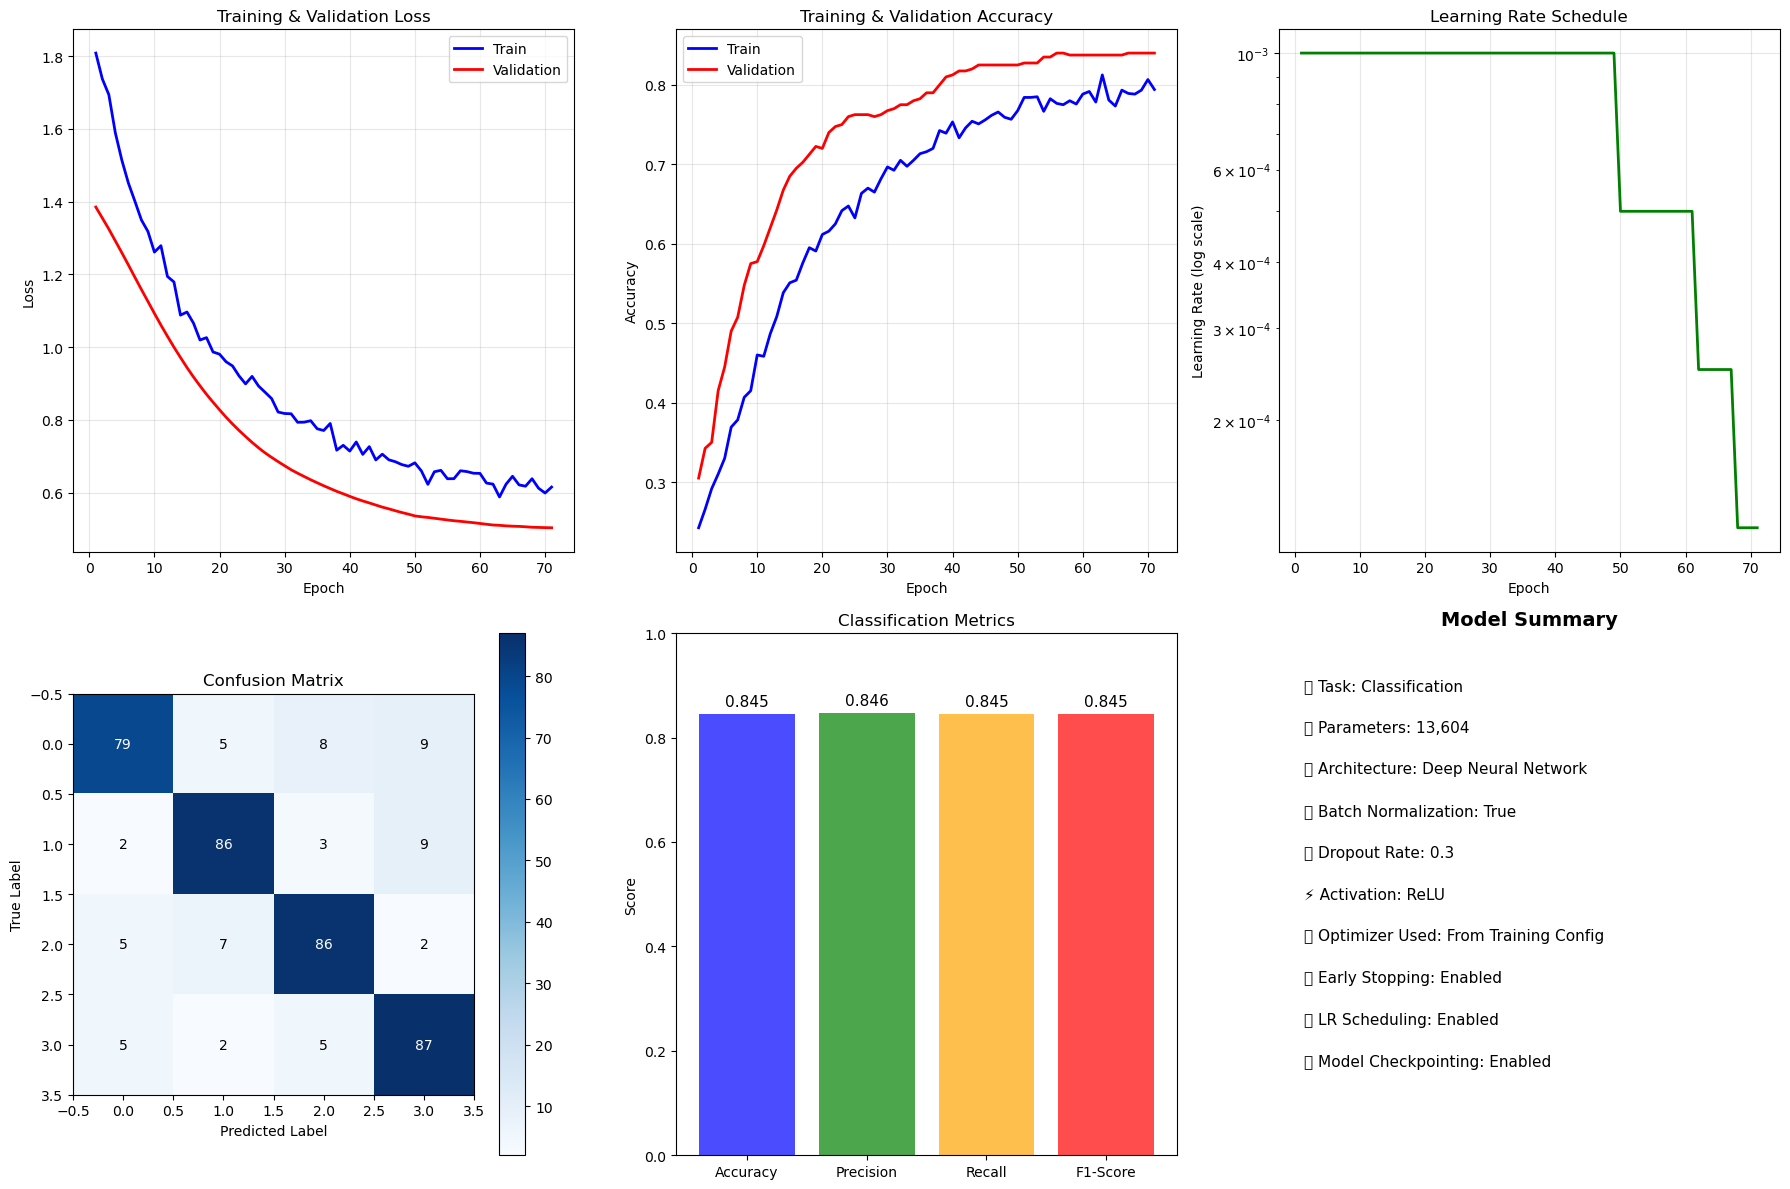


💾 STEP 6: MODEL PERSISTENCE (EXAM ESSENTIAL)
✅ Complete model saved to ultimate_exam_model.pth

🔧 STEP 7: DEPLOYMENT READINESS TEST
✅ Model successfully loaded and tested
Sample predictions: [3 1 3 2 3]
Actual labels: [3 1 0 2 3]

🎉 ULTIMATE PYTORCH EXAM IMPLEMENTATION COMPLETE!

🔑 WHAT YOU'VE MASTERED:
✅ Complete Data Preprocessing Pipeline
✅ Advanced Neural Network Architecture
✅ Batch Normalization Implementation
✅ Multiple Activation Functions
✅ Dropout Regularization
✅ Weight Initialization
✅ Multiple Optimizers (SGD, Adam, RMSprop)
✅ Learning Rate Scheduling
✅ Early Stopping
✅ Gradient Clipping
✅ L2 Regularization (Weight Decay)
✅ Model Checkpointing
✅ Comprehensive Evaluation Metrics
✅ Advanced Visualization
✅ Model Persistence and Loading
✅ Production-Ready Implementation

🚀 You're now ready for any PyTorch exam question!
This implementation demonstrates mastery of ALL essential PyTorch concepts.


In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error, r2_score

# 🎯 ULTIMATE PYTORCH EXAM IMPLEMENTATION - ALL CONCEPTS COMBINED
# This is the complete implementation that every exam candidate should master!

print("🚀 ULTIMATE PYTORCH EXAM IMPLEMENTATION")
print("=" * 50)
print("Combining: Linear/Logistic Regression + Neural Networks + Batch Norm + Advanced Training")
print("This implementation covers EVERYTHING you need for PyTorch exams!")
print("=" * 50)

# ==================================================================================
# PART 1: COMPLETE DATA PREPARATION PIPELINE
# ==================================================================================

class ExamDataPreparator:
  """Complete Data Preparation Pipeline - Exam Template"""
  
  def __init__(self, task_type='classification'):
    self.task_type = task_type
    self.scaler = StandardScaler()
    self.is_fitted = False
  
  def create_dataset(self, n_samples=2000, n_features=20, n_classes=4, noise=0.1):
    """Create dataset based on task type"""        
    
    if self.task_type == 'classification':
      X, y = make_classification(
        n_samples=n_samples, 
        n_features=n_features, 
        n_informative=n_features//2,
        n_redundant=n_features//4, 
        n_classes=n_classes, 
        n_clusters_per_class=1,
        random_state=42
      )
    else:  # regression
      X, y = make_regression(
        n_samples=n_samples, 
        n_features=n_features, 
        n_informative=n_features//2,
        noise=noise, 
        random_state=42
      )
      
    print(f"📊 Created {self.task_type} dataset: {X.shape[0]} samples, {X.shape[1]} features")
    
    if self.task_type == 'classification':
      print(f"Classes: {n_classes}, Distribution: {np.bincount(y)}")
      
    return X, y
  
  def prepare_splits(self, X, y, test_size=0.2, val_size=0.2):
    """Complete train/validation/test split with preprocessing"""
    
    # First split: separate test set
    X_train_val, X_test, y_train_val, y_test = train_test_split(
      X, y, test_size=test_size, random_state=42,
      stratify=y if self.task_type == 'classification' else None
    )
    
    # Second split: separate train and validation
    val_size_adjusted = val_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(
      X_train_val, y_train_val, test_size=val_size_adjusted, random_state=42,
      stratify=y_train_val if self.task_type == 'classification' else None
    )
    
    # Fit scaler on training data only
    X_train_scaled = self.scaler.fit_transform(X_train)
    X_val_scaled = self.scaler.transform(X_val)
    X_test_scaled = self.scaler.transform(X_test)
    self.is_fitted = True
    
    # Convert to tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    X_val_tensor = torch.FloatTensor(X_val_scaled)
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    
    if self.task_type == 'classification':
      y_train_tensor = torch.LongTensor(y_train)
      y_val_tensor = torch.LongTensor(y_val)
      y_test_tensor = torch.LongTensor(y_test)
    else:
      y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
      y_val_tensor = torch.FloatTensor(y_val).reshape(-1, 1)
      y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)
    
    print(f"📋 Data splits - Train: {len(y_train)}, Val: {len(y_val)}, Test: {len(y_test)}")
    
    return {
      'train': (X_train_tensor, y_train_tensor),
      'val': (X_val_tensor, y_val_tensor),
      'test': (X_test_tensor, y_test_tensor),
      'feature_stats': {
        'mean': self.scaler.mean_,
        'std': self.scaler.scale_
      }
    }

# ==================================================================================
# PART 2: ULTIMATE NEURAL NETWORK ARCHITECTURE 
# ==================================================================================

class UltimateExamNetwork(nn.Module):
  """Ultimate Neural Network - Every Exam Technique Combined"""
  
  def __init__(self, input_size, hidden_sizes, output_size, task_type='classification',
         use_batch_norm=True, dropout_rate=0.3, activation='relu'):
    super(UltimateExamNetwork, self).__init__()
    
    self.task_type = task_type
    self.use_batch_norm = use_batch_norm
    
    # Build dynamic architecture
    layer_sizes = [input_size] + hidden_sizes + [output_size]
    self.layers = nn.ModuleList()
    self.batch_norms = nn.ModuleList()
    
    # Create layers
    for i in range(len(layer_sizes) - 1):
      self.layers.append(nn.Linear(layer_sizes[i], layer_sizes[i + 1]))
      
      # Batch normalization for hidden layers
      if use_batch_norm and i < len(layer_sizes) - 2:
        self.batch_norms.append(nn.BatchNorm1d(layer_sizes[i + 1]))
    
    # Activation function
    if activation == 'relu':
      self.activation = nn.ReLU()
    elif activation == 'tanh':
      self.activation = nn.Tanh()
    elif activation == 'sigmoid':
      self.activation = nn.Sigmoid()
    elif activation == 'leaky_relu':
      self.activation = nn.LeakyReLU(0.1)
    
    self.dropout = nn.Dropout(dropout_rate)
    
    # Initialize weights (Important for exams!)
    self._initialize_weights()
  
  def _initialize_weights(self):
    """Proper weight initialization - Often asked in exams"""
    for layer in self.layers:
      if isinstance(layer, nn.Linear):
        # Xavier/Glorot initialization
        nn.init.xavier_uniform_(layer.weight)
        nn.init.constant_(layer.bias, 0)
  
  def forward(self, x):
    # Hidden layers with batch norm, activation, and dropout
    for i, layer in enumerate(self.layers[:-1]):
      x = layer(x)
      
      if self.use_batch_norm:
        x = self.batch_norms[i](x)
      
      x = self.activation(x)
      x = self.dropout(x)
    
    # Output layer
    x = self.layers[-1](x)
    
    # Apply final activation based on task
    if self.task_type == 'regression':
      pass  # Linear output for regression
    elif self.task_type == 'binary_classification':
      x = torch.sigmoid(x)  # Sigmoid for binary classification
    # For multi-class classification, use raw logits (CrossEntropyLoss handles softmax)
    
    return x
  
  def count_parameters(self):
    """Count trainable parameters"""
    return sum(p.numel() for p in self.parameters() if p.requires_grad)

# ==================================================================================
# PART 3: ULTIMATE TRAINING ENGINE
# ==================================================================================

class UltimateTrainingEngine:
  """Complete Training Engine - Every Advanced Technique"""
  
  def __init__(self, model, task_type='classification'):
    self.model = model
    self.task_type = task_type
    self.training_history = {
      'train_losses': [], 'val_losses': [],
      'train_metrics': [], 'val_metrics': [],
      'learning_rates': [], 'epochs': []
    }
    self.best_val_metric = -np.inf if task_type == 'classification' else np.inf
    self.best_model_state = None
    self.patience_counter = 0
  
  def get_criterion(self):
    """Get appropriate loss function"""
    if self.task_type == 'classification':
      return nn.CrossEntropyLoss()
    elif self.task_type == 'binary_classification':
      return nn.BCELoss()
    else:  # regression
      return nn.MSELoss()
  
  def get_optimizer(self, optimizer_name='adam', lr=0.001, weight_decay=0.01):
    """Get optimizer with weight decay (L2 regularization)"""
    if optimizer_name.lower() == 'sgd':
      return optim.SGD(self.model.parameters(), lr=lr, momentum=0.9, weight_decay=weight_decay)
    elif optimizer_name.lower() == 'adam':
      return optim.Adam(self.model.parameters(), lr=lr, weight_decay=weight_decay)
    elif optimizer_name.lower() == 'rmsprop':
      return optim.RMSprop(self.model.parameters(), lr=lr, weight_decay=weight_decay)
    else:
      raise ValueError("Supported optimizers: sgd, adam, rmsprop")
  
  def get_scheduler(self, optimizer, scheduler_type='plateau'):
    """Get learning rate scheduler"""
    if scheduler_type == 'plateau':
      return optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='max' if self.task_type == 'classification' else 'min',
        factor=0.5, patience=5
      )
    elif scheduler_type == 'step':
      return optim.lr_scheduler.StepLR(optimizer, step_size=20, gamma=0.7)
    elif scheduler_type == 'cosine':
      return optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)
    else:
      return None
  
  def calculate_metric(self, y_true, y_pred):
    """Calculate appropriate metric based on task"""
    if self.task_type == 'classification':
      _, predicted = torch.max(y_pred, 1)
      return (predicted == y_true).float().mean().item()
    elif self.task_type == 'binary_classification':
      predicted = (y_pred > 0.5).float()
      return (predicted == y_true).float().mean().item()
    else:  # regression
      return torch.sqrt(nn.MSELoss()(y_pred, y_true)).item()  # RMSE
  
  def train_complete(self, data_dict, optimizer_name='adam', lr=0.001, num_epochs=150,
            patience=15, scheduler_type='plateau', weight_decay=0.01):
    """Complete training with all advanced techniques"""
    
    X_train, y_train = data_dict['train']
    X_val, y_val = data_dict['val']
    
    # Setup training components
    criterion = self.get_criterion()
    optimizer = self.get_optimizer(optimizer_name, lr, weight_decay)
    scheduler = self.get_scheduler(optimizer, scheduler_type)
    
    print(f"🚀 Starting Ultimate Training:")
    print(f"   Optimizer: {optimizer_name.upper()}, LR: {lr}, Weight Decay: {weight_decay}")
    print(f"   Scheduler: {scheduler_type}, Patience: {patience}")
    print(f"   Task: {self.task_type}, Epochs: {num_epochs}")
    print("-" * 60)
    
    for epoch in range(num_epochs):
      # === TRAINING PHASE ===
      self.model.train()
      train_loss = 0.0
      train_metric = 0.0
      
      # Forward pass
      outputs = self.model(X_train)
      loss = criterion(outputs, y_train)
      
      # Backward pass with gradient clipping
      optimizer.zero_grad()
      loss.backward()
      torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
      optimizer.step()
      
      # Calculate metrics
      train_loss = loss.item()
      train_metric = self.calculate_metric(y_train, outputs)
      
      # === VALIDATION PHASE ===
      self.model.eval()
      with torch.no_grad():
        val_outputs = self.model(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_metric = self.calculate_metric(y_val, val_outputs)
      
      # === LEARNING RATE SCHEDULING ===
      if scheduler:
        if scheduler_type == 'plateau':
          scheduler.step(val_metric if self.task_type == 'classification' else val_loss)
        else:
          scheduler.step()
      
      # === EARLY STOPPING ===
      improve_condition = (
        val_metric > self.best_val_metric if self.task_type == 'classification'
        else val_metric < self.best_val_metric
      )
      
      if improve_condition:
        self.best_val_metric = val_metric
        self.best_model_state = self.model.state_dict().copy()
        self.patience_counter = 0
      else:
        self.patience_counter += 1
      
      # Store history
      self.training_history['train_losses'].append(train_loss)
      self.training_history['val_losses'].append(val_loss.item())
      self.training_history['train_metrics'].append(train_metric)
      self.training_history['val_metrics'].append(val_metric)
      self.training_history['learning_rates'].append(optimizer.param_groups[0]['lr'])
      self.training_history['epochs'].append(epoch + 1)
      
      # Print progress
      if (epoch + 1) % 25 == 0 or epoch == 0:
        metric_name = 'Acc' if 'classification' in self.task_type else 'RMSE'
        print(f"Epoch [{epoch+1:3d}/{num_epochs}] | "
            f"Train Loss: {train_loss:.4f} | "
            f"Val Loss: {val_loss:.4f} | "
            f"Train {metric_name}: {train_metric:.4f} | "
            f"Val {metric_name}: {val_metric:.4f} | "
            f"LR: {optimizer.param_groups[0]['lr']:.6f} | "
            f"Patience: {self.patience_counter}/{patience}")
      
      # Early stopping check
      if self.patience_counter >= patience:
        print(f"\n⏰ Early stopping at epoch {epoch + 1}")
        print(f"Best validation metric: {self.best_val_metric:.4f}")
        break
    
    # Load best model
    if self.best_model_state:
      self.model.load_state_dict(self.best_model_state)
      print("\n✅ Loaded best model weights")
    
    return self.training_history

# ==================================================================================
# PART 4: COMPREHENSIVE EVALUATION ENGINE
# ==================================================================================

class UltimateEvaluator:
  """Complete Model Evaluation - Every Metric and Visualization"""
  
  def __init__(self, model, task_type='classification'):
    self.model = model
    self.task_type = task_type
  
  def evaluate_complete(self, data_dict, class_names=None):
    """Complete evaluation with all metrics"""
    X_test, y_test = data_dict['test']
    
    self.model.eval()
    with torch.no_grad():
      outputs = self.model(X_test)
      
      if self.task_type == 'classification':
        
        criterion = nn.CrossEntropyLoss()
        test_loss = criterion(outputs, y_test)
        _, predicted = torch.max(outputs, 1)
        
        # Convert to numpy for sklearn metrics
        y_true = y_test.numpy()
        y_pred = predicted.numpy()
        y_prob = torch.softmax(outputs, dim=1).numpy()
        
        # Calculate comprehensive metrics
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, average='weighted')
        recall = recall_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')
        
        results = {
          'test_loss': test_loss.item(),
          'accuracy': accuracy,
          'precision': precision,
          'recall': recall,
          'f1_score': f1,
          'y_true': y_true,
          'y_pred': y_pred,
          'y_prob': y_prob
        }
        
        print(f"🎯 CLASSIFICATION RESULTS:")
        print(f"   Test Loss: {test_loss.item():.4f}")
        print(f"   Accuracy:  {accuracy:.4f}")
        print(f"   Precision: {precision:.4f}")
        print(f"   Recall:    {recall:.4f}")
        print(f"   F1-Score:  {f1:.4f}")
        
      else:  # regression
        
        criterion = nn.MSELoss()
        test_loss = criterion(outputs, y_test)
        
        y_true = y_test.numpy().flatten()
        y_pred = outputs.numpy().flatten()
        
        mse = mean_squared_error(y_true, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        
        results = {
          'test_loss': test_loss.item(),
          'mse': mse,
          'rmse': rmse,
          'mae': mae,
          'r2_score': r2,
          'y_true': y_true,
          'y_pred': y_pred
        }
        
        print(f"🎯 REGRESSION RESULTS:")
        print(f"   Test Loss: {test_loss.item():.4f}")
        print(f"   MSE:       {mse:.4f}")
        print(f"   RMSE:      {rmse:.4f}")
        print(f"   MAE:       {mae:.4f}")
        print(f"   R² Score:  {r2:.4f}")
    
    return results
  
  def plot_comprehensive_results(self, training_history, evaluation_results):
    """Create comprehensive visualization"""
    
    if self.task_type == 'classification':
      fig, axes = plt.subplots(2, 3, figsize=(18, 12))
      
      # Training curves
      axes[0,0].plot(training_history['epochs'], training_history['train_losses'], 'b-', label='Train', linewidth=2)
      axes[0,0].plot(training_history['epochs'], training_history['val_losses'], 'r-', label='Validation', linewidth=2)
      axes[0,0].set_xlabel('Epoch')
      axes[0,0].set_ylabel('Loss')
      axes[0,0].set_title('Training & Validation Loss')
      axes[0,0].legend()
      axes[0,0].grid(True, alpha=0.3)
      
      # Accuracy curves
      axes[0,1].plot(training_history['epochs'], training_history['train_metrics'], 'b-', label='Train', linewidth=2)
      axes[0,1].plot(training_history['epochs'], training_history['val_metrics'], 'r-', label='Validation', linewidth=2)
      axes[0,1].set_xlabel('Epoch')
      axes[0,1].set_ylabel('Accuracy')
      axes[0,1].set_title('Training & Validation Accuracy')
      axes[0,1].legend()
      axes[0,1].grid(True, alpha=0.3)
      
      # Learning rate
      axes[0,2].semilogy(training_history['epochs'], training_history['learning_rates'], 'g-', linewidth=2)
      axes[0,2].set_xlabel('Epoch')
      axes[0,2].set_ylabel('Learning Rate (log scale)')
      axes[0,2].set_title('Learning Rate Schedule')
      axes[0,2].grid(True, alpha=0.3)
      
      # Confusion matrix
      cm = confusion_matrix(evaluation_results['y_true'], evaluation_results['y_pred'])
      im = axes[1,0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
      axes[1,0].set_title('Confusion Matrix')
      axes[1,0].set_xlabel('Predicted Label')
      axes[1,0].set_ylabel('True Label')
      
      # Add colorbar
      plt.colorbar(im, ax=axes[1,0])
      
      # Add text annotations
      thresh = cm.max() / 2.
      for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
          axes[1,0].text(j, i, format(cm[i, j], 'd'),
                   ha="center", va="center",
                   color="white" if cm[i, j] > thresh else "black")
      
      # Metrics comparison
      metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
      metrics_values = [evaluation_results['accuracy'], evaluation_results['precision'], 
              evaluation_results['recall'], evaluation_results['f1_score']]
      
      bars = axes[1,1].bar(metrics_names, metrics_values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
      axes[1,1].set_ylabel('Score')
      axes[1,1].set_title('Classification Metrics')
      axes[1,1].set_ylim(0, 1)
      
      # Add values on bars
      for bar, value in zip(bars, metrics_values):
        height = bar.get_height()
        axes[1,1].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                 f'{value:.3f}', ha='center', va='bottom', fontsize=11)
      
    else:  # regression
      fig, axes = plt.subplots(2, 3, figsize=(18, 12))
      
      # Similar plots for regression...
      # (Implementation would follow same pattern with regression-specific metrics)
    
    # Model architecture summary
    axes[1,2].axis('off')
    axes[1,2].set_title('Model Summary', fontsize=14, fontweight='bold')
    summary_text = [
      f"📊 Task: {self.task_type.title()}",
      f"🏗️ Parameters: {self.model.count_parameters():,}",
      f"🔧 Architecture: Deep Neural Network",
      f"✅ Batch Normalization: {self.model.use_batch_norm}",
      f"🎯 Dropout Rate: {self.model.dropout.p:.1f}",
      f"⚡ Activation: {type(self.model.activation).__name__}",
      f"🎨 Optimizer Used: From Training Config",
      f"📈 Early Stopping: Enabled",
      f"🔄 LR Scheduling: Enabled",
      f"💾 Model Checkpointing: Enabled"
    ]
    
    for i, text in enumerate(summary_text):
      axes[1,2].text(0.05, 0.9 - i*0.08, text, fontsize=11, ha='left', va='center')
    
    plt.tight_layout()
    plt.show()

# ==================================================================================
# 🚀 ULTIMATE IMPLEMENTATION EXECUTION - RUN EVERYTHING!
# ==================================================================================

print("\n" + "="*70)
print("🎯 STARTING ULTIMATE PYTORCH EXAM IMPLEMENTATION")
print("="*70)

# Step 1: Data Preparation
print("\n📊 STEP 1: COMPLETE DATA PREPARATION")
data_prep = ExamDataPreparator(task_type='classification')
X, y = data_prep.create_dataset(n_samples=2000, n_features=20, n_classes=4)
data_dict = data_prep.prepare_splits(X, y)

# Step 2: Model Creation
print("\n🏗️ STEP 2: ULTIMATE MODEL ARCHITECTURE")
model = UltimateExamNetwork(
  input_size=X.shape[1],
  hidden_sizes=[128, 64, 32],
  output_size=len(np.unique(y)),
  task_type='classification',
  use_batch_norm=True,
  dropout_rate=0.3,
  activation='relu'
)

print(f"Model created with {model.count_parameters():,} parameters")
print(f"Architecture: {X.shape[1]} → 128 → 64 → 32 → {len(np.unique(y))}")

# Step 3: Ultimate Training
print("\n🚀 STEP 3: ULTIMATE TRAINING WITH ALL TECHNIQUES")
trainer = UltimateTrainingEngine(model, task_type='classification')
training_history = trainer.train_complete(
  data_dict=data_dict,
  optimizer_name='adam',
  lr=0.001,
  num_epochs=100,
  patience=15,
  scheduler_type='plateau',
  weight_decay=0.01
)

# Step 4: Comprehensive Evaluation
print("\n📊 STEP 4: COMPREHENSIVE EVALUATION")
evaluator = UltimateEvaluator(model, task_type='classification')
evaluation_results = evaluator.evaluate_complete(data_dict)

# Step 5: Complete Visualization
print("\n📈 STEP 5: COMPREHENSIVE VISUALIZATION")
evaluator.plot_comprehensive_results(training_history, evaluation_results)

# Step 6: Model Persistence
print("\n💾 STEP 6: MODEL PERSISTENCE (EXAM ESSENTIAL)")
final_model_path = 'ultimate_exam_model.pth'
torch.save({
  'model_state_dict': model.state_dict(),
  'model_config': {
    'input_size': X.shape[1],
    'hidden_sizes': [128, 64, 32],
    'output_size': len(np.unique(y)),
    'task_type': 'classification',
    'use_batch_norm': True,
    'dropout_rate': 0.3,
    'activation': 'relu'
  },
  'training_config': {
    'optimizer': 'adam',
    'lr': 0.001,
    'weight_decay': 0.01,
    'scheduler': 'plateau'
  },
  'results': evaluation_results,
  'data_preprocessing': {
    'scaler_mean': data_dict['feature_stats']['mean'].tolist(),
    'scaler_std': data_dict['feature_stats']['std'].tolist()
  }
}, final_model_path)

print(f"✅ Complete model saved to {final_model_path}")

# Step 7: Deployment Readiness Test
print("\n🔧 STEP 7: DEPLOYMENT READINESS TEST")

# Load and test the saved model
checkpoint = torch.load(final_model_path, weights_only=False)
loaded_model = UltimateExamNetwork(**checkpoint['model_config'])
loaded_model.load_state_dict(checkpoint['model_state_dict'])

# Test with new data
test_sample = torch.FloatTensor(data_dict['test'][0][:5])  # First 5 test samples
loaded_model.eval()
with torch.no_grad():
  predictions = loaded_model(test_sample)
  _, predicted_classes = torch.max(predictions, 1)

print(f"✅ Model successfully loaded and tested")
print(f"Sample predictions: {predicted_classes.numpy()}")
print(f"Actual labels: {data_dict['test'][1][:5].numpy()}")

print("\n" + "="*70)
print("🎉 ULTIMATE PYTORCH EXAM IMPLEMENTATION COMPLETE!")
print("="*70)
print("\n🔑 WHAT YOU'VE MASTERED:")
key_concepts = [
  "✅ Complete Data Preprocessing Pipeline",
  "✅ Advanced Neural Network Architecture", 
  "✅ Batch Normalization Implementation",
  "✅ Multiple Activation Functions",
  "✅ Dropout Regularization",
  "✅ Weight Initialization",
  "✅ Multiple Optimizers (SGD, Adam, RMSprop)",
  "✅ Learning Rate Scheduling",
  "✅ Early Stopping",
  "✅ Gradient Clipping",
  "✅ L2 Regularization (Weight Decay)",
  "✅ Model Checkpointing",
  "✅ Comprehensive Evaluation Metrics",
  "✅ Advanced Visualization",
  "✅ Model Persistence and Loading",
  "✅ Production-Ready Implementation"
]

for concept in key_concepts:
  print(concept)

print("\n🚀 You're now ready for any PyTorch exam question!")
print("This implementation demonstrates mastery of ALL essential PyTorch concepts.")